In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_excel("faltas_treinamento_tratadas.xlsx")

Exercício 4 – Análise Descritiva Avançada<br/>
a) Qual o número total de evasões por departamento?<br/>
b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?<br/>
c) Qual é o desvio padrão de faltas por turno?

In [21]:
# a) 

evasoes_departamentos = df[df['Evadiu'] == 'Sim'].groupby('Departamento').size()
print(evasoes_departamentos)

Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
dtype: int64


In [22]:
# b) 

## Porcentagem relação de pessoas que evadiram do período da tarde & todas as pessoas
evasoes_tarde = df[df['Turno'] == 'Tarde']
evasoes_tarde_pct = (evasoes_tarde['Evadiu'] == 'Sim').sum() / len(evasoes_tarde) * 100
print(f"{evasoes_tarde_pct:.2f} %")

## Porcentagem relação de pessoas que evadiram do período da tarde & pessoas que evadiram do período da manhã
evasoes = df[df['Evadiu'] == 'Sim']
pct_tarde_evasoes = (evasoes['Turno'] == 'Tarde').sum() / len(evasoes) * 100
print(f"{pct_tarde_evasoes:.2f} %")

8.85 %
47.62 %


In [23]:
# c)

faltas_turno = df.groupby('Turno')['Faltas'].std()
print(faltas_turno)

Turno
Manhã    1.376872
Tarde    1.430269
Name: Faltas, dtype: float64


Exercício 5 – Análise Temporal<br/>
a) Em qual mês ocorreu o maior número de faltas?<br/>
b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de
ausências.<br/>
c) Faça uma análise cruzando dia da semana e quantidade de evasões.

In [24]:
# a) 

df['Mes_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.month
maior_numero_faltas_mes = df.groupby('Mes_Ultima_Falta')['Faltas'].sum()
print(f'O Mês {maior_numero_faltas_mes.idxmax()} teve o maior número de faltas com {maior_numero_faltas_mes.max()} faltas' )

O Mês 3 teve o maior número de faltas com 161 faltas


In [25]:
# b)

df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.isocalendar().week
maior_numero_faltas_semana = df.groupby('Semana_Ultima_Falta')['Faltas'].sum()
print(f'A semana {maior_numero_faltas_semana.idxmax()} teve o maior número de faltas com {maior_numero_faltas_semana.max()} faltas')

A semana 12 teve o maior número de faltas com 57 faltas


In [26]:
# c)

evasoes_dia_semana = pd.crosstab(df['Dia_da_Semana_Ultima_Falta'], df['Evadiu'])
print(evasoes_dia_semana)

Evadiu                      Desconhecido  Não  Sim
Dia_da_Semana_Ultima_Falta                        
Domingo                                5   41    3
Quarta-feira                           2   31    4
Quinta-feira                           0   20    4
Segunda-feira                          2   18    2
Sexta-feira                            2   24    3
Sábado                                 0   30    3
Terça-feira                            2   21    2


Exercício 6 – Análise de Risco<br/>
a) Crie a coluna Risco_Evasao com três categorias: "Alto", "Moderado", "Baixo".<br/>
b) Gere uma tabela com a distribuição percentual de risco por departamento.<br/>
c) Há relação entre risco alto e turno da tarde?

In [27]:
# a)

def classificar_risco(faltas):
    if faltas >= 7:
        return 'Alto'
    elif faltas >= 4:
        return 'Moderado'
    else:
        return 'Baixo'

df['Risco_Evasao'] = df['Faltas'].apply(classificar_risco)
print(df['Risco_Evasao'])

0      Baixo
1      Baixo
2      Baixo
3      Baixo
4      Baixo
       ...  
214    Baixo
215    Baixo
216    Baixo
217    Baixo
218    Baixo
Name: Risco_Evasao, Length: 219, dtype: object


In [28]:
# b)

distribuicao_percentual = evasoes_dia_semana = pd.crosstab(df['Departamento'], df['Risco_Evasao'], normalize='index') * 100
print(distribuicao_percentual)

Risco_Evasao      Baixo   Moderado
Departamento                      
Financeiro    82.857143  17.142857
Marketing     85.365854  14.634146
Operações     86.538462  13.461538
RH            90.322581   9.677419
TI            83.333333  16.666667
Vendas        80.000000  20.000000


In [29]:
# c)

relacao_risco_alto_tarde = df[(df['Risco_Evasao'] == 'Alto') & (df['Turno'] == 'Tarde')]
relacao = 'Não' if len(relacao_risco_alto_tarde) == 0 else 'Sim'
print(relacao)

Não


Exercício 7 – Visualizações Estratégicas<br/>
a) Gráfico de barras: número de faltas por departamento.<br/>
b) Gráfico de pizza: distribuição de risco de evasão.<br/>
c) Heatmap cruzando Turno e Risco_Evasao.

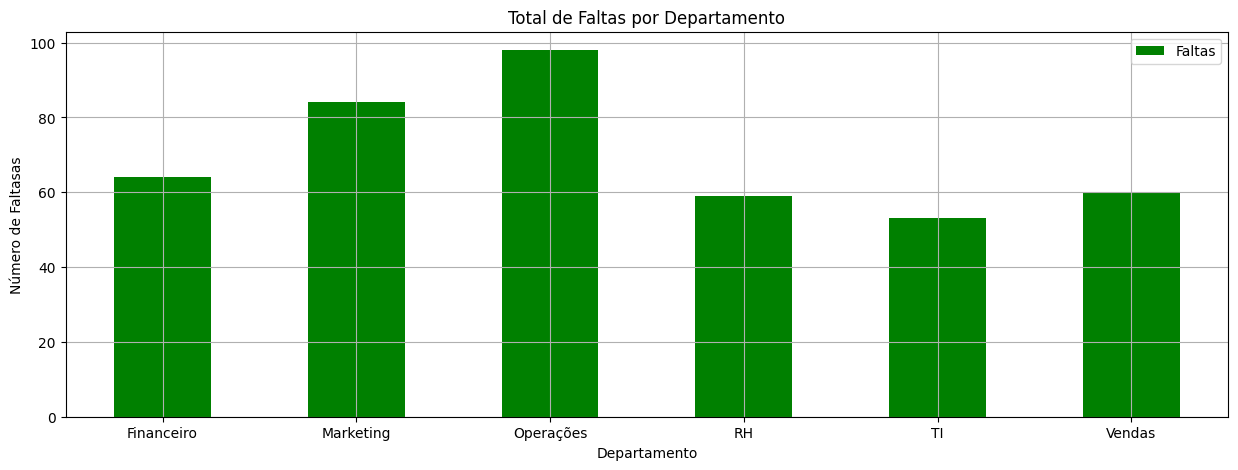

In [30]:
# a)

plt.figure(figsize=(15,5))
numero_faltas_por_departamento = df.groupby('Departamento')['Faltas'].sum()
numero_faltas_por_departamento.plot(kind='bar', color='green')

plt.title('Total de Faltas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Faltasas')


plt.grid(True)
plt.xticks(rotation=360)
plt.legend()

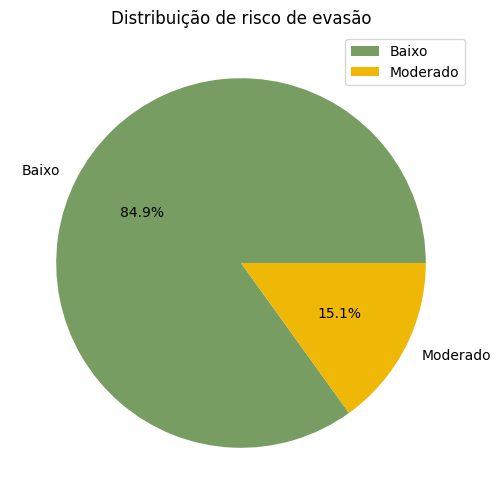

In [36]:
# b)

plt.figure(figsize=(6, 6))
distribuicao_risco_evasao = df['Risco_Evasao'].value_counts()
distribuicao_risco_evasao.plot(kind='pie', autopct='%1.1f%%', colors=['#789D63', '#EFB807', 'Red'])

plt.title('Distribuição de risco de evasão')
plt.ylabel('')
plt.legend()

plt.show()

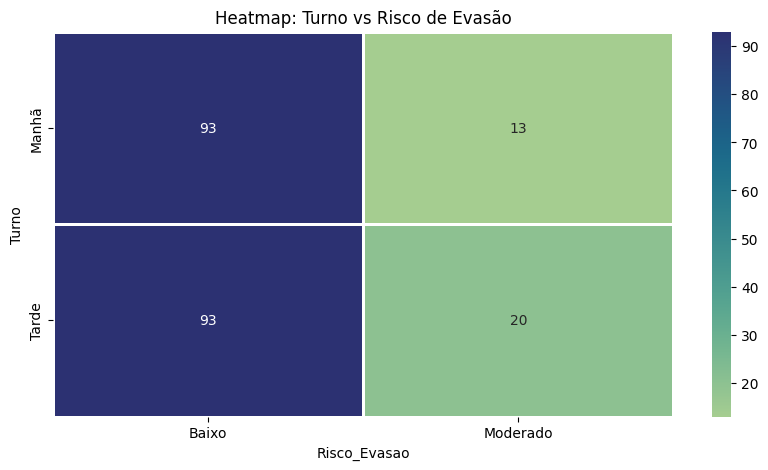

In [32]:
# c)

plt.figure(figsize=(10,5))
risco_evasao_por_turno = pd.crosstab(df['Turno'], df['Risco_Evasao'])
sb.heatmap(risco_evasao_por_turno, annot=True, linewidths=2.0, cmap="crest", fmt='d')
plt.title("Heatmap: Turno vs Risco de Evasão")
plt.show()